<a href="https://colab.research.google.com/github/purva98/DeepPixel/blob/img_subset/subset_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aim : 
1. Given two input images. Determine if one small image is a subset of another larger image. If yes,then highlight the small part in the larger image. 
2. Find multiple instances of the small image, in the larger image. Highlight the subsets found.



Part 1 :

In [0]:
# Importing necessary libraries
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

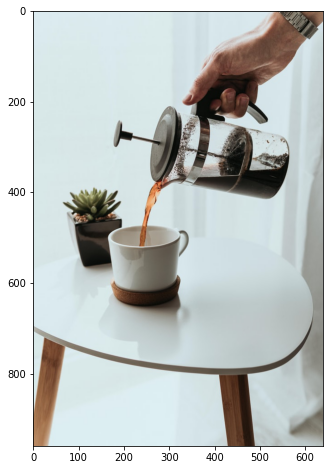

In [0]:
# Input Image :  The Larger Image
large_image = Image.open('large.jpg')
plt.figure(figsize = (8,8))
plt.imshow(large_image)

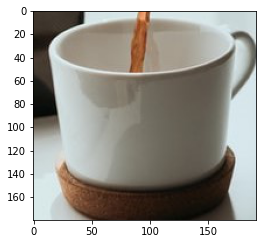

In [0]:
# Input Image :  The Smaller Image
small_image = Image.open('small.jpg')
plt.figure(figsize = (4,4))
plt.imshow(small_image)

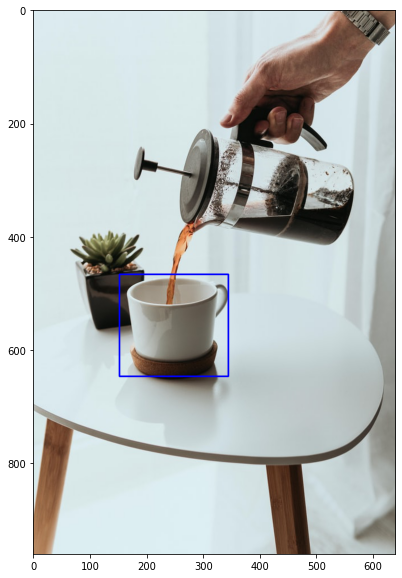

In [0]:
# Use OpenCv matching Template 
# We simply slide the smaller image over the larger image, and perform template matching
matched_area = cv2.matchTemplate(np.array(small_image), np.array(large_image), cv2.TM_SQDIFF_NORMED)
# Now we use minMaxLoc of OpenCV to extract the minimum squared diffence
minimum_1,_,minimum_f,_ = cv2.minMaxLoc(matched_area)
# Now we store the coordinates of our best template matched result
best_x,best_y= minimum_f
# No. of rows and columns
R,C = np.array(small_image).shape[:2]
# Drawing the rectangle on the larger image and displaying the results
result_image = cv2.rectangle(np.array(large_image), (best_x,best_y),(best_x+C,best_y+R),(0,0,255),2)
plt.figure(figsize = (10,10))
plt.imshow(result_image)

Part 2 :

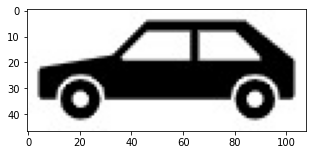

In [0]:
# Read the subset image (the smaller image whose instance we wish to find)
subset = cv2.imread('single_car.jpg')
subset_gray = cv2.imread('single_car.jpg',0)
width, height = subset_gray.shape[::-1]
plt.figure(figsize = (5,5))
plt.imshow(subset)

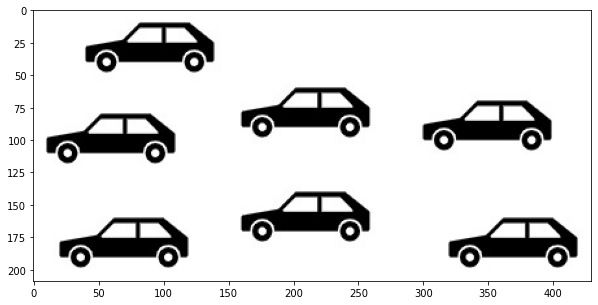

In [0]:
# now we wil read the larger image, which contains many instances of the subset image.
larger_img = cv2.imread('many_cars.jpg')
img_gray = cv2.cvtColor(larger_img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (10,10))
plt.imshow(larger_img)

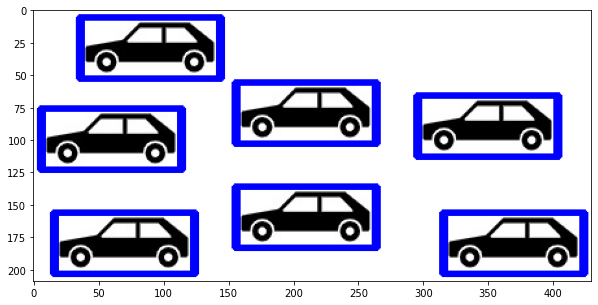

In [0]:
result_image = cv2.matchTemplate(img_gray,subset_gray,cv2.TM_CCOEFF_NORMED)
thresh = 0.8
location = np.where(result_image >= thresh)
for i in zip(*location[::-1]):
    cv2.rectangle(larger_img,i,(i[0] + width, i[1] + height), (0,0,255), 2)

plt.figure(figsize = (10,10))
plt.imshow(larger_img)